In [ ]:
import pandas as pd

- Importação do pandas utilizando o alias `pd`.

# **Dados de Junho**📅

In [ ]:
junho = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-06-gasolina-etanol.csv', sep=';')
junho.head(10)

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA ADITIVADA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,ETANOL,01/06/2021,"6,1",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,GASOLINA,01/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,AVENIDA LAURO MULLER,943,NaN,JOÃO ALVES,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,BRANCA
5,N,AC,RIO BRANCO,COMDEPE COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.198.443/0001-00,AVENIDA NACOES UNIDAS,23,NaN,AVIARIO,69909-720,GASOLINA ADITIVADA,01/06/2021,"6,34",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
6,N,AC,RIO BRANCO,COMDEPE COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.198.443/0001-00,AVENIDA NACOES UNIDAS,23,NaN,AVIARIO,69909-720,GASOLINA,01/06/2021,"6,28",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
7,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GASOLINA ADITIVADA,01/06/2021,"6,29",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
8,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,ETANOL,01/06/2021,"5,27",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
9,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GASOLINA,01/06/2021,"6,23",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.


### **Transformando o campo de venda para float e trocando vírgula por ponto.**

In [ ]:
junho['Valor de Venda'] = junho['Valor de Venda'].apply(lambda x:x.replace(',', '.')).astype(float)#transformando o campo valor de venda pra float
del junho['Valor de Compra'] #excluindo a coluna vazia

- No campo acima também deletei a coluna "Valor de Compra", pois estava vazia.

# **Dados de Julho📅**

In [ ]:
julho = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-07-gasolina-etanol.csv', sep=';')
julho

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,GASOLINA,01/07/2021,"5,499",NaN,R$ / litro,IPIRANGA
1,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,ETANOL,01/07/2021,"5,2",NaN,R$ / litro,IPIRANGA
2,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,GASOLINA ADITIVADA,01/07/2021,"5,699",NaN,R$ / litro,IPIRANGA
3,NE,CE,MARACANAU,LUIZA GLAURIA R T MENEZES,03.602.329/0001-10,ESTRADA FORTALEZA MARANGUAPE,S/N,NaN,KAGADO,61901-410,GASOLINA,01/07/2021,"5,49",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,NE,CE,MARACANAU,LUIZA GLAURIA R T MENEZES,03.602.329/0001-10,ESTRADA FORTALEZA MARANGUAPE,S/N,NaN,KAGADO,61901-410,ETANOL,01/07/2021,"4,99",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47844,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,NaN,CENTRO,29190-010,GASOLINA ADITIVADA,26/07/2021,"5,87",NaN,R$ / litro,BRANCA
47845,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,NaN,CENTRO,29190-010,ETANOL,26/07/2021,"4,99",NaN,R$ / litro,BRANCA
47846,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,NaN,CENTRO,29190-010,GASOLINA,26/07/2021,"5,87",NaN,R$ / litro,BRANCA
47847,SE,MG,ARAXA,AUTO POSTO BRANQUINHO LTDA,37.461.683/0001-94,AVENIDA SENADOR MONTANDON,950,NaN,CENTRO,38183-214,ETANOL,28/07/2021,"4,599",NaN,R$ / litro,RIO BRANCO


In [ ]:
julho['Valor de Venda'] = julho['Valor de Venda'].apply(lambda x:x.replace(',', '.')).astype(float)#transformando o campo valor de venda pra float
del julho['Valor de Compra'] #excluindo a coluna vazia

- O mesmo foi feito com o Dataframe de Julho




## **Preço médio dos combustíveis de Junho** ✅:

### **Preço médio de combustíveis de Junho.**

- Agrupei a coluna "Produto", referente aos combustíveis juntamente com os respectivos valores. Após isso, utilizei a função `mean()` solicitei a média dos valores de combustíveis. Essa ação foi feita também para os dados de Julho.

In [ ]:
preco_medio_combustiveis = junho.groupby(["Produto"])['Valor de Venda'] #agrupando combustíveis e valor
preco_medio_combustiveis.mean() #calculando a média

Produto
ETANOL                4.576389
GASOLINA              5.671506
GASOLINA ADITIVADA    5.819346
Name: Valor de Venda, dtype: float64

## **Preço médio dos combustíveis de Julho** ✅:

### **Preço médio dos combustíveis de Julho.**

In [ ]:
preco_medio_junho = junho.groupby(["Produto"])['Valor de Venda'].mean() #agrupando combustíveis e valor
preco_medio_junho#calculando a média

Produto
ETANOL                4.576389
GASOLINA              5.671506
GASOLINA ADITIVADA    5.819346
Name: Valor de Venda, dtype: float64

In [ ]:
preco_medio_julho = julho.groupby(["Produto"])['Valor de Venda'].mean() #agrupando combustíveis e valor
preco_medio_julho#calculando a média

Produto
ETANOL                4.587550
GASOLINA              5.800254
GASOLINA ADITIVADA    5.943826
Name: Valor de Venda, dtype: float64

## **1) Como se comportaram o preço dos combustíveis durante os dois meses citados?**
### 1.1) Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?

### **Resposta:**  Tendência de alta.

In [ ]:
import matplotlib.pyplot as plt


- Para verificar a alteração de preços entre um mês e outro optei por um gráfico do tipo `scatter`. Isto pois gráficos de linha passavam a sensação que havia uma evolução de valores sendo que na verdade eram valores independentes.

Text(0.5, 1.0, 'Variação do preço de combustíveis - Junho a Julho')

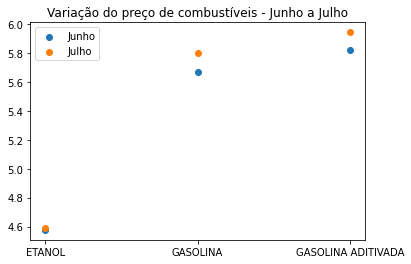

In [ ]:
plt.scatter(preco_medio_junho.index, preco_medio_junho, label = 'Junho'  )
plt.scatter(preco_medio_julho.index, preco_medio_julho, label = 'Julho')
plt.legend()
plt.title('Variação do preço de combustíveis - Junho a Julho')

# **2) Qual o preço médio da gasolina e do etanol nesses dois meses**

### **Filtrando o campo Gasolina - Junho e Julho**

- Para fazer essa filtragem fiz um filtro buscando pelo produto Gasolina. Utilizei `.shape` para ver quantos valores retornava nos dois meses.

In [ ]:
junho[junho['Produto'] == 'GASOLINA'].shape[0] #criando uma séries e retornando o total de linhas de gasolina

18804

In [ ]:
julho[julho['Produto'] == 'GASOLINA'].shape[0] #criando uma séries e retornando o total de linhas de gasolina

18149

**Preço médio da Gasolina - Junho e Julho**

Com o filtro anterior foi necessário apenas utilizar novamente a função para visualizar a média.

In [ ]:
gasolina_junho = junho[junho['Produto'] == 'GASOLINA'] 
gasolina_junho.mean() #visualizando só o campo gasolina

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Valor de Venda    5.671506
dtype: float64

In [ ]:
gasolina_julho = julho[julho['Produto'] == 'GASOLINA'] 
gasolina_julho.mean() #visualizando só o campo gasolina

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Valor de Venda    5.800254
dtype: float64

### **Resposta:** Variação de R$ 0,13 centavos para a Gasolina

- O resultado é derivado da simples diferença entre cada mês.

**Preço médio Etanol - Junho e Julho**

In [ ]:
etanol_junho = junho[junho['Produto'] == 'ETANOL']
etanol_junho.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Valor de Venda    4.576389
dtype: float64

In [ ]:
etanol_julho = julho[julho['Produto'] == 'ETANOL']
etanol_julho.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Valor de Venda    4.58755
dtype: float64

### **Resposta:** Variação de R$ 0,01 centavos para o Etanol.